In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving IMDB_Top250Engmovies2_OMDB_Detailed.csv to IMDB_Top250Engmovies2_OMDB_Detailed.csv


In [3]:
import io
movies = pd.read_csv(io.BytesIO(uploaded1['IMDB_Top250Engmovies2_OMDB_Detailed.csv']))


In [4]:
#viewing the first five columns
movies.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,82.0,9.0,"1,802,351",tt0468569,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,8.9/10,96.0,8.9,"494,215",tt0050083,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [5]:
movies.shape

(250, 38)

In [6]:
#finding the rating which has the highest number of movies. we see that most movies are R rated.
rated_count=movies['Rated'].value_counts().sort_values(ascending=False)
rated_count=pd.DataFrame(rated_count)
toprated=rated_count[0:11]
toprated

,Rated
R,104
PG,39
PG-13,34
APPROVED,30
G,16
NOT RATED,15
UNRATED,5
PASSED,5
GP,1
TV-MA,1


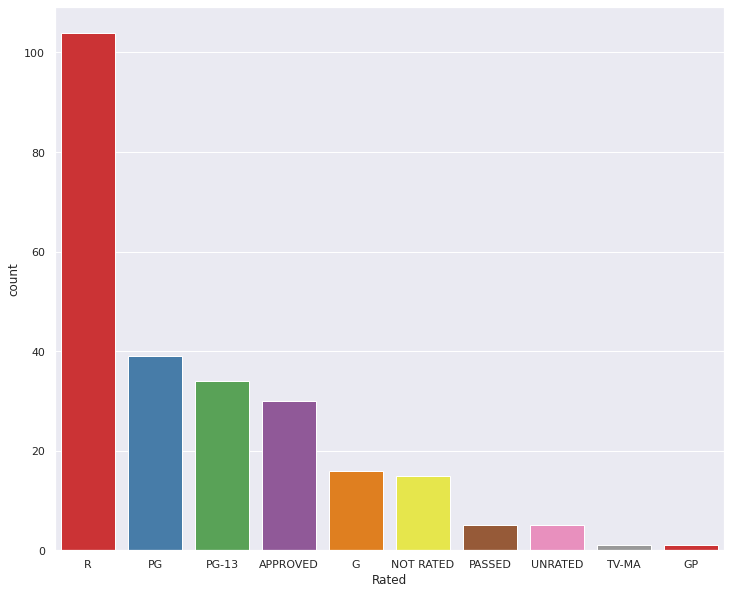

In [7]:
#visualising the ratings through a countplot
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rated", data=movies, palette="Set1", order=movies['Rated'].value_counts().index[0:15])

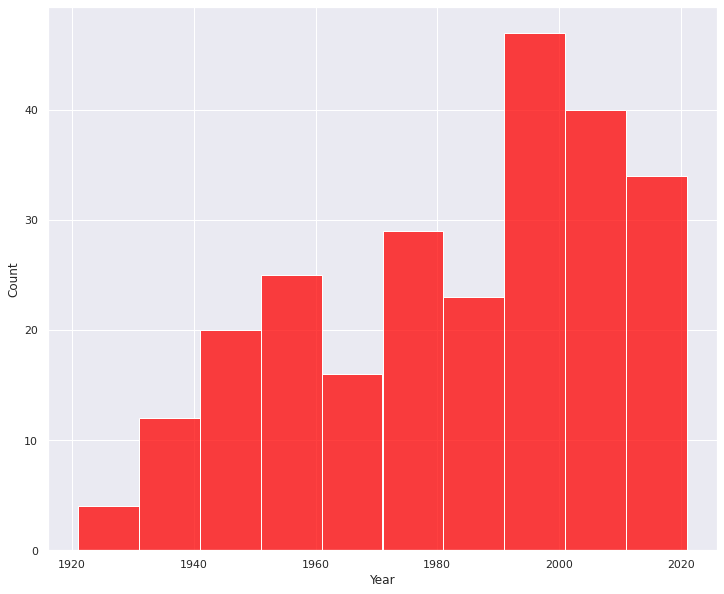

In [8]:
#seeing the first 15 years with the highest number of movies produced
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.histplot(x="Year", data=movies, color='red', binwidth=10)

In [9]:
#We see that highest number of movies were produced between 1990-2000.

In [10]:
genres = []
for i in movies['Genre']:
  genres.append(movies['Genre'].map(lambda x:x.split(',')))

In [11]:
print(genres)

[0                 [Crime,  Drama]
1                 [Crime,  Drama]
2                 [Crime,  Drama]
3        [Action,  Crime,  Drama]
4                 [Crime,  Drama]
                  ...            
245           [Drama,  Film-Noir]
246                       [Drama]
247    [Comedy,  Drama,  Romance]
248           [Biography,  Drama]
249                       [Drama]
Name: Genre, Length: 250, dtype: object, 0                 [Crime,  Drama]
1                 [Crime,  Drama]
2                 [Crime,  Drama]
3        [Action,  Crime,  Drama]
4                 [Crime,  Drama]
                  ...            
245           [Drama,  Film-Noir]
246                       [Drama]
247    [Comedy,  Drama,  Romance]
248           [Biography,  Drama]
249                       [Drama]
Name: Genre, Length: 250, dtype: object, 0                 [Crime,  Drama]
1                 [Crime,  Drama]
2                 [Crime,  Drama]
3        [Action,  Crime,  Drama]
4                 [Crime,  Drama]

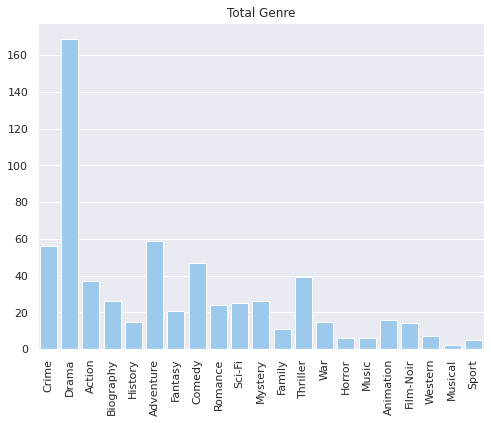

In [12]:

movie_genres = movies['Genre'].map(lambda x:x.split(', '))
genres = []
for genre in movie_genres:
  if (len(genre)>=2):
    for i in genre:
      if i not in genres:
        genres.append(i)
  elif genre not in genres:
    if isinstance(genre,list):
      genres.append(genre[0])
genres = set(genres)
def process_genre(genres):
  genre_list=[]
  for genre in genres.split(', '):
    genre_list.append(genre)
  return genre_list

movies['genre_list'] = movies['Genre'].map(process_genre)
#movies.head()
movies = movies.reset_index(drop=True)
total_genre_list = []
for idx in range(len(movies)):
  for genre in movies['genre_list'][idx]:
    total_genre_list.append(genre)
genre_counter = Counter (total_genre_list)
genre_counter_indx = np.asarray(list(genre_counter.keys()))
genre_counter_val = np.asarray(list(genre_counter.values()))
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = genre_counter_indx, y = genre_counter_val,color='#90caf9',ax=ax)
plt.title('Total Genre')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
del fig,ax,ticks

In [13]:
movies = movies[['Actors','Director','Genre','Plot','Title']]
movies.head()

,Actors,Director,Genre,Plot,Title
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Frank Darabont,"Crime, Drama",Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Francis Ford Coppola,"Crime, Drama",The aging patriarch of an organized crime dyna...,The Godfather
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Francis Ford Coppola,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,"Action, Crime, Drama",When the menace known as the Joker emerges fro...,The Dark Knight
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Sidney Lumet,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [14]:
# discarding the commas between the actors' full names and getting only the first three names
movies['Actors'] = movies['Actors'].map(lambda x: x.split(', ')[:3])

# putting the genres in a list of words
movies['Genre'] = movies['Genre'].map(lambda x: x.lower().split(','))

movies['Director'] = movies['Director'].map(lambda x: x.split(' '))


In [15]:
for index,row in movies.iterrows():
  row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
  row['Director'] = ''.join(row['Director']).lower()

In [16]:
!pip install rake_nltk
from rake_nltk import Rake

movies['Keywords'] = ""

for index,row in movies.iterrows():
  plot = row['Plot']
   # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
  rake = Rake()

    # extracting the words by passing the text
  rake.extract_keywords_from_text(plot)

    # getting the dictionary with key words and their scores
  key_words_dict_scores = rake.get_word_degrees()
    
    # assigning the key words to the new column
  row['Keywords'] = list(key_words_dict_scores.keys())

# dropping the Plot column
movies.drop(columns = ['Plot'], inplace = True)


  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=0b5f6b2a8f7b5ed879f866baf6e65b21e5c9637a0888c0134054e57c1f2ce598
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [17]:
movies.head()

,Actors,Director,Genre,Title,Keywords
0,"[timrobbins, morganfreeman, bobgunton]",frankdarabont,"[crime, drama]",The Shawshank Redemption,"[two, imprisoned, men, bond, common, decency, ..."
1,"[marlonbrando, alpacino, jamescaan]",francisfordcoppola,"[crime, drama]",The Godfather,"[organized, crime, dynasty, transfers, control..."
2,"[alpacino, robertduvall, dianekeaton]",francisfordcoppola,"[crime, drama]",The Godfather: Part II,"[michael, career, family, crime, syndicate, ti..."
3,"[christianbale, heathledger, aaroneckhart]",christophernolan,"[action, crime, drama]",The Dark Knight,"[dark, knight, must, accept, one, joker, emerg..."
4,"[martinbalsam, johnfiedler, leej.cobb]",sidneylumet,"[crime, drama]",12 Angry Men,"[justice, prevent, colleagues, jury, holdout, ..."


In [18]:
movies['All_Words'] = ''
col = movies.columns
for index,row in movies.iterrows():
  w = ''
  for c in col:
    if c != 'Director':
      w = w + ' '.join(row[c]) + ' '
    else:
      w = w + row[c] + ' '
    row['All_Words'] = w
  


In [19]:
movies.head()

,Actors,Director,Genre,Title,Keywords,All_Words
0,"[timrobbins, morganfreeman, bobgunton]",frankdarabont,"[crime, drama]",The Shawshank Redemption,"[two, imprisoned, men, bond, common, decency, ...",timrobbins morganfreeman bobgunton frankdarabo...
1,"[marlonbrando, alpacino, jamescaan]",francisfordcoppola,"[crime, drama]",The Godfather,"[organized, crime, dynasty, transfers, control...",marlonbrando alpacino jamescaan francisfordcop...
2,"[alpacino, robertduvall, dianekeaton]",francisfordcoppola,"[crime, drama]",The Godfather: Part II,"[michael, career, family, crime, syndicate, ti...",alpacino robertduvall dianekeaton francisfordc...
3,"[christianbale, heathledger, aaroneckhart]",christophernolan,"[action, crime, drama]",The Dark Knight,"[dark, knight, must, accept, one, joker, emerg...",christianbale heathledger aaroneckhart christo...
4,"[martinbalsam, johnfiedler, leej.cobb]",sidneylumet,"[crime, drama]",12 Angry Men,"[justice, prevent, colleagues, jury, holdout, ...",martinbalsam johnfiedler leej.cobb sidneylumet...


In [20]:
movies.drop(columns = ['Actors'],inplace=True)
movies.drop(columns = ['Director'],inplace=True)
movies.drop(columns = ['Genre'],inplace=True)
movies.drop(columns = ['Keywords'],inplace=True)

In [21]:
movies.head()

,Title,All_Words
0,The Shawshank Redemption,timrobbins morganfreeman bobgunton frankdarabo...
1,The Godfather,marlonbrando alpacino jamescaan francisfordcop...
2,The Godfather: Part II,alpacino robertduvall dianekeaton francisfordc...
3,The Dark Knight,christianbale heathledger aaroneckhart christo...
4,12 Angry Men,martinbalsam johnfiedler leej.cobb sidneylumet...


In [22]:
movies.set_index('Title',inplace=True)

In [23]:
movies.head()

,All_Words
Title,
The Shawshank Redemption,timrobbins morganfreeman bobgunton frankdarabo...
The Godfather,marlonbrando alpacino jamescaan francisfordcop...
The Godfather: Part II,alpacino robertduvall dianekeaton francisfordc...
The Dark Knight,christianbale heathledger aaroneckhart christo...
12 Angry Men,martinbalsam johnfiedler leej.cobb sidneylumet...


In [24]:
movies.to_csv('movies.csv')

In [25]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(movies['All_Words'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)


# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(movies.index)

#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(movies.index)[i])
        
    return recommended_movies



In [26]:
example=recommendations("Fargo")
print(example)

['No Country for Old Men', 'The Departed', 'Rope', 'The Godfather', 'Reservoir Dogs', 'The Godfather: Part II', 'On the Waterfront', 'Goodfellas', 'Arsenic and Old Lace', 'The Big Lebowski']


In [27]:
g = input("Enter movie name : ")
exm=recommendations(g)
print (exm)

Enter movie name : 12 Angry Men
['On the Waterfront', 'American History X', 'Dog Day Afternoon', 'The Godfather', 'L.A. Confidential', 'The Godfather: Part II', 'Rope', 'Cool Hand Luke', 'Fargo', 'Goodfellas']


In [28]:
import pickle

In [29]:
pickle_out = open("dict.pickle","wb")
pickle.dump(exm, pickle_out)
pickle_out.close()

In [30]:
pickle_in = open("dict.pickle","rb")
example_dict = pickle.load(pickle_in)

In [31]:
print(example_dict)
print(example_dict[3])

['On the Waterfront', 'American History X', 'Dog Day Afternoon', 'The Godfather', 'L.A. Confidential', 'The Godfather: Part II', 'Rope', 'Cool Hand Luke', 'Fargo', 'Goodfellas']
The Godfather
